In [1]:
import os
import nltk

from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /Users/joao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/joao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Download dos arquivos

In [2]:
DOWNLOAD_PATH = './propostas_pdf'
if (not os.path.isdir(DOWNLOAD_PATH)):
    print("Downloading propostas...")
    os.makedirs(DOWNLOAD_PATH)
    import urllib.request, json
    with urllib.request.urlopen("http://divulgacandcontas.tse.jus.br/divulga/rest/v1/candidatura/listar/2018/BR/2022802018/1/candidatos") as candidatos_req:
        candidatos_data = json.loads(candidatos_req.read().decode())
        for candidato in candidatos_data['candidatos']:
            with urllib.request.urlopen("http://divulgacandcontas.tse.jus.br/divulga/rest/v1/candidatura/buscar/2018/BR/2022802018/candidato/{}".format(candidato['id'])) as info_req:
                info_data = json.loads(info_req.read().decode())
                for arquivo in info_data['arquivos']:
                    if arquivo['codTipo'] == '5':
                        numero = info_data['numero']
                        nome = info_data['nomeUrna']
                        proposta_pdf_url = 'http://divulgacandcontas.tse.jus.br/' + arquivo['url'] + arquivo['nome']
                        print(f'#{numero} {nome} {proposta_pdf_url}')
                        urllib.request.urlretrieve(proposta_pdf_url, f'{DOWNLOAD_PATH}/{numero}_{nome}.pdf')
else:
    print("Already downloaded. Skipping...")

#19 ALVARO DIAS http://divulgacandcontas.tse.jus.br/candidaturas/oficial/2018/BR/BR/2022802018/280000618462/proposta_1534304719669.pdf
#51 CABO DACIOLO http://divulgacandcontas.tse.jus.br/candidaturas/oficial/2018/BR/BR/2022802018/280000602500/proposta_1533774159360.pdf
#12 CIRO GOMES http://divulgacandcontas.tse.jus.br/candidaturas/oficial/2018/BR/BR/2022802018/280000605589/proposta_1533938913830.pdf
#27 EYMAEL http://divulgacandcontas.tse.jus.br/candidaturas/oficial/2018/BR/BR/2022802018/280000624085/proposta_1534450200223.pdf
#13 FERNANDO HADDAD http://divulgacandcontas.tse.jus.br/candidaturas/oficial/2018/BR/BR/2022802018/280000629808/proposta_1536702143353.pdf
#45 GERALDO ALCKMIN http://divulgacandcontas.tse.jus.br/candidaturas/oficial/2018/BR/BR/2022802018/280000602477/proposta_1533849607885.pdf
#50 GUILHERME BOULOS http://divulgacandcontas.tse.jus.br/candidaturas/oficial/2018/BR/BR/2022802018/280000601016/proposta_1533565462424.pdf
#15 HENRIQUE MEIRELLES http://divulgacandcontas

# Converter PDFs em texto

Requires `poppler` installed.

In [3]:
! ls -l propostas_pdf | sort -k9

total 23808
-rw-r--r--  1 joao  staff   358547 Sep 19 21:43 12_CIRO GOMES.pdf
-rw-r--r--  1 joao  staff  2748456 Sep 19 21:44 13_FERNANDO HADDAD.pdf
-rw-r--r--  1 joao  staff  1457649 Sep 19 21:45 13_LULA.pdf
-rw-r--r--  1 joao  staff   467222 Sep 19 21:44 15_HENRIQUE MEIRELLES.pdf
-rw-r--r--  1 joao  staff    65503 Sep 19 21:45 16_VERA.pdf
-rw-r--r--  1 joao  staff  1866450 Sep 19 21:45 17_JAIR BOLSONARO.pdf
-rw-r--r--  1 joao  staff   828506 Sep 19 21:45 18_MARINA SILVA.pdf
-rw-r--r--  1 joao  staff   844039 Sep 19 21:43 19_ALVARO DIAS.pdf
-rw-r--r--  1 joao  staff   259782 Sep 19 21:43 27_EYMAEL.pdf
-rw-r--r--  1 joao  staff  1136830 Sep 19 21:45 30_JOÃO AMOÊDO.pdf
-rw-r--r--  1 joao  staff   616160 Sep 19 21:44 45_GERALDO ALCKMIN.pdf
-rw-r--r--  1 joao  staff   861547 Sep 19 21:44 50_GUILHERME BOULOS.pdf
-rw-r--r--  1 joao  staff   269657 Sep 19 21:43 51_CABO DACIOLO.pdf
-rw-r--r--  1 joao  staff   379086 Sep 19 21:45 54_JOÃO GOULART FILHO.pdf


In [4]:
! mkdir -p propostas_txt
! find ./propostas_pdf -iname '*.pdf' -exec pdftotext {} \;
! mv ./propostas_pdf/*.txt propostas_txt
! ls -la propostas_txt | sort -k9

total 2760
drwxr-xr-x  16 joao  staff     512 Sep 19 21:46 .
drwxr-xr-x@  8 joao  staff     256 Sep 19 21:45 ..
-rw-r--r--   1 joao  staff  123378 Sep 19 21:45 12_CIRO GOMES.txt
-rw-r--r--   1 joao  staff  215810 Sep 19 21:45 13_FERNANDO HADDAD.txt
-rw-r--r--   1 joao  staff  220587 Sep 19 21:45 13_LULA.txt
-rw-r--r--   1 joao  staff   24674 Sep 19 21:46 15_HENRIQUE MEIRELLES.txt
-rw-r--r--   1 joao  staff   14216 Sep 19 21:45 16_VERA.txt
-rw-r--r--   1 joao  staff   58257 Sep 19 21:45 17_JAIR BOLSONARO.txt
-rw-r--r--   1 joao  staff  106875 Sep 19 21:45 18_MARINA SILVA.txt
-rw-r--r--   1 joao  staff   16618 Sep 19 21:46 19_ALVARO DIAS.txt
-rw-r--r--   1 joao  staff   12890 Sep 19 21:45 27_EYMAEL.txt
-rw-r--r--   1 joao  staff   28846 Sep 19 21:45 30_JOÃO AMOÊDO.txt
-rw-r--r--   1 joao  staff    9192 Sep 19 21:45 45_GERALDO ALCKMIN.txt
-rw-r--r--   1 joao  staff  459608 Sep 19 21:46 50_GUILHERME BOULOS.txt
-rw-r--r--   1 joao  staff   32370 Sep 19 21:46 51_CABO DACIOLO.txt
-rw-r--r--  

# Some basic overview

### number of lines, words and chars

In [5]:
! find ./propostas_txt -iname '*.txt' -exec wc -mlw {} + | sort -k2 -r

   22815  199891 1324375 total
    8325   67007  442897 ./propostas_txt/50_GUILHERME BOULOS.txt
    2759   31295  208048 ./propostas_txt/13_FERNANDO HADDAD.txt
    2522   30934  212907 ./propostas_txt/13_LULA.txt
    2378   18187  118646 ./propostas_txt/12_CIRO GOMES.txt
    1290   15376  103015 ./propostas_txt/18_MARINA SILVA.txt
    2182    8561   56271 ./propostas_txt/17_JAIR BOLSONARO.txt
     636    7569   48675 ./propostas_txt/54_JOÃO GOULART FILHO.txt
     560    4833   31222 ./propostas_txt/51_CABO DACIOLO.txt
     549    4464   27840 ./propostas_txt/30_JOÃO AMOÊDO.txt
     434    3799   23847 ./propostas_txt/15_HENRIQUE MEIRELLES.txt
     393    2454   16015 ./propostas_txt/19_ALVARO DIAS.txt
     178    2204   13789 ./propostas_txt/16_VERA.txt
     276    1853   12391 ./propostas_txt/27_EYMAEL.txt
     333    1355    8812 ./propostas_txt/45_GERALDO ALCKMIN.txt


In [6]:
propostas_arquivos = os.listdir('propostas_txt')
propostas_arquivos.sort()

propostas_arquivos

['12_CIRO GOMES.txt',
 '13_FERNANDO HADDAD.txt',
 '13_LULA.txt',
 '15_HENRIQUE MEIRELLES.txt',
 '16_VERA.txt',
 '17_JAIR BOLSONARO.txt',
 '18_MARINA SILVA.txt',
 '19_ALVARO DIAS.txt',
 '27_EYMAEL.txt',
 '30_JOÃO AMOÊDO.txt',
 '45_GERALDO ALCKMIN.txt',
 '50_GUILHERME BOULOS.txt',
 '51_CABO DACIOLO.txt',
 '54_JOÃO GOULART FILHO.txt']

In [7]:
propostas_textos = {}

for arquivo in propostas_arquivos:
    file_path = 'propostas_txt/' + arquivo
    key = arquivo.split(".")[0]
    
    with open(file_path, 'r') as myfile:
        content=myfile.read().replace('\n',' ')
        propostas_textos[key] = content

# 12_CIRO GOMES


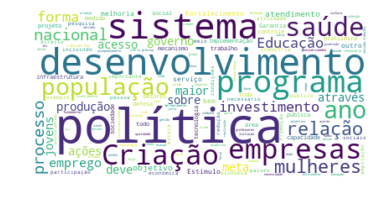

# 13_FERNANDO HADDAD


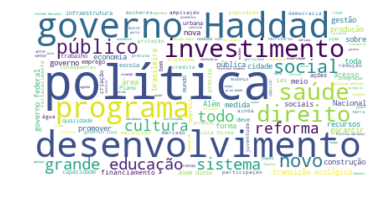

# 13_LULA


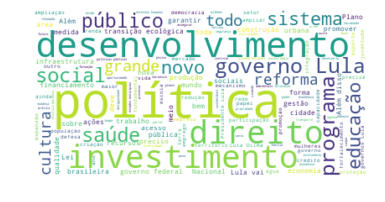

# 15_HENRIQUE MEIRELLES


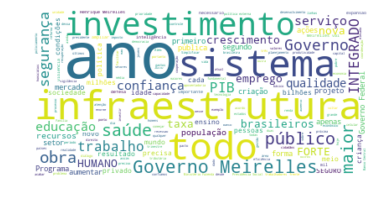

# 16_VERA


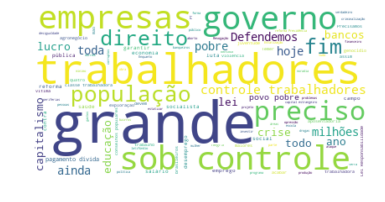

# 17_JAIR BOLSONARO


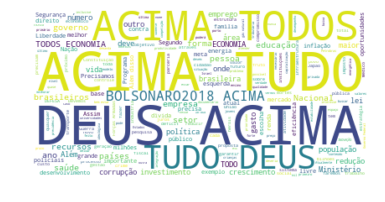

# 18_MARINA SILVA


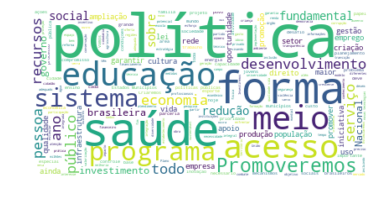

# 19_ALVARO DIAS


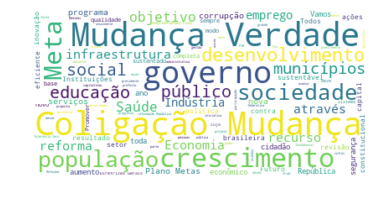

# 27_EYMAEL


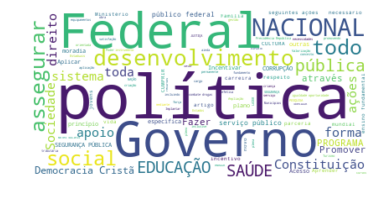

# 30_JOÃO AMOÊDO


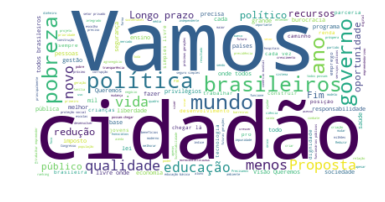

# 45_GERALDO ALCKMIN


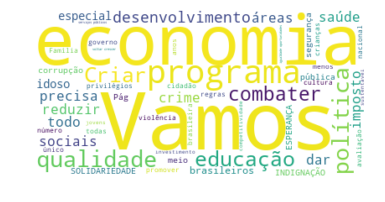

# 50_GUILHERME BOULOS


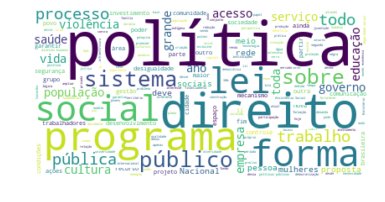

# 51_CABO DACIOLO


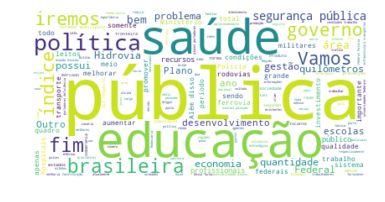

# 54_JOÃO GOULART FILHO


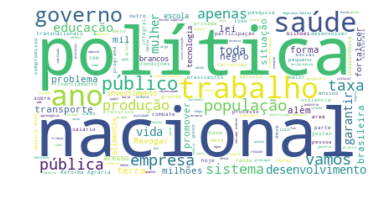

In [8]:
for candidato, proposta in propostas_textos.items():
    print("# " + candidato)
    tokens = word_tokenize(proposta.lower())
    punctuations = ['(',')',';',':','[',']',',','.','!','%','•','n','\x07','-','–','“','”','...']
    
    stop_words = stopwords.words('portuguese')
    stop_words += ['ser', 'ter', 'é', 'brasil', 'brasileiro', 'país', 'estado']

    keywords = [word for word in tokens if not word in stop_words and not word in punctuations]
    
#     counter = Counter(keywords)
#     print(counter.most_common(20))
    wc = WordCloud(background_color="white",stopwords=stop_words)
    wc.generate_from_text(proposta)

    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.show()